# Computing the Euclidean Distance

In [1]:
import pandas as pd
import numpy as np
import os 
import math
import random
import matplotlib.pyplot as plt

### Load a Data Set and Save it as a Pandas DataFrame

We will work with a new data set called "cell2cell." This data set is used to analyze cellular telephone customers and can be used to predict whether a customer will remain with their current telecom service or leave to another.



In [2]:
filename = os.path.join(os.getcwd(), "data","cell2cell.csv")
df = pd.read_csv(filename, header=0)

### Inspect the Data

In [3]:
df.head()

,CustomerID,Churn,ServiceArea,ChildrenInHH,HandsetRefurbished,HandsetWebCapable,TruckOwner,RVOwner,HomeownershipKnown,BuysViaMailOrder,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,3000002,True,SEAPOR503,False,False,True,False,False,True,True,...,0.487071,-0.077013,1.387766,-0.883541,4.662897,-0.1283,-0.169283,-0.103411,-0.140707,-0.864858
1,3000010,True,PITHOM412,True,False,False,False,False,True,True,...,-0.616775,3.019920,0.392039,0.871495,-0.180167,-0.1283,-0.169283,0.215243,-0.140707,-0.864858
2,3000014,False,MILMIL414,True,False,False,False,False,False,False,...,-0.616775,3.019920,-0.241605,0.202910,-0.180167,-0.1283,-0.169283,0.533896,-0.140707,-0.368174
3,3000022,False,PITHOM412,False,False,True,False,False,True,True,...,2.694763,0.305179,-0.060564,-0.883541,-0.180167,-0.1283,-0.169283,0.533896,-0.140707,-1.195980
4,3000026,True,OKCTUL918,False,False,False,False,False,True,True,...,1.590917,1.857585,0.663601,1.372934,-0.180167,-0.1283,-0.169283,1.489856,2.469282,-1.195980


In [4]:
df.dtypes

CustomerID                     int64
Churn                           bool
ServiceArea                   object
ChildrenInHH                    bool
HandsetRefurbished              bool
HandsetWebCapable               bool
TruckOwner                      bool
RVOwner                         bool
HomeownershipKnown              bool
BuysViaMailOrder                bool
RespondsToMailOffers            bool
OptOutMailings                  bool
NonUSTravel                     bool
OwnsComputer                    bool
HasCreditCard                   bool
NewCellphoneUser                bool
NotNewCellphoneUser             bool
OwnsMotorcycle                  bool
MadeCallToRetentionTeam         bool
CreditRating                  object
PrizmCode                     object
Occupation                    object
Married                       object
MonthlyRevenue               float64
MonthlyMinutes               float64
TotalRecurringCharge         float64
DirectorAssistedCalls        float64
O

In [5]:
df.shape

(51047, 58)

## Euclidean Distance

#### KNN
<p>k-Nearest Neighbors (KNN) is an instance-based learning algorithm. To make a classification for a given unlabeled example $A$, we search the training data for the $k$ nearest neighbors, as defined by some distance metric $d(A,B)$ in which $B$ represents another example. We choose the most common label among the nearest neighbor examples to be our prediction (label) for the unlabeled example.<br>
    
The most commonly used distance metric for KNN is the Euclidean distance.

#### Euclidean Distance

For two n-dimensional, real-valued vectors $A,B \in \mathbb{R}^n$, the Euclidean distance $eud$ is defined as:

$$ eud(A, B) = \sqrt{\sum_{i=1}^{n}{(B_i-A_i)^2}}$$


Euclidean distance finds the distance between two vectors of the same length. In this formula, $A_i$ is the $i$-th coordinate of vector $A$, and $B_i$ is the $i$-th coordinate of vector $B$.


Let's relate this to a dataset. Let's think of the vectors $A$ and $B$ as being two examples (rows) in a dataset. 

Let $A = <x^a_1,...x^a_n>$ be a $n$-dimensional vector ($x^a_i$ is the $i$-th feature in example $A$ and $n$ is the total number of features). 

Then for two vectors (examples) $A$ and $B$ the Euclidean distance is defined as:<br><br>
<center>$eud(A, B) = \sqrt{(x^b_1-x^a_1)^2+ (x^b_2-x^a_2)^2+...+(x^b_n-x^a_n)^2} = \sqrt{\sum\limits_{i=1}^n (x^b_i-x^a_i)^2}$
</center>
<br><br>
</p>


To visualize KNN, you can picture plotting the examples (also called data points) in our dataset and finding the distance between them. Let's create a visualization to see how we plot examples and find the distance between each example.

To easily visualize this, let's plot two examples from DataFrame `df`. Note that each example contains many features, but to make this visualization even simpler, we will work with two dimensions (that is, two features). 

Euclidean distance is best used to calculate the distance between vectors containing numerical values. Therefore, we will choose two features that have numerical values.

Let us use row 0 and row 4 in DataFrame `df` and focus on features `HandsetModels` and `AgeHH1`. Run the code below to examine the two examples we will be plotting.



In [6]:
display(df.loc[[0,4],['HandsetModels','AgeHH1']])


,HandsetModels,AgeHH1
0,0.487071,1.387766
4,1.590917,0.663601


Each example (row) can be viewed as a vector:

example 1: `(0.487071, 1.387766)`

example 2:  `(1.590917, 0.663601)`


You will use the Euclidean distance  formula to find the distance between these two vectors. First, let's plot these vectors. Run the code cell below to generate a plot. Examine the resulting plot.

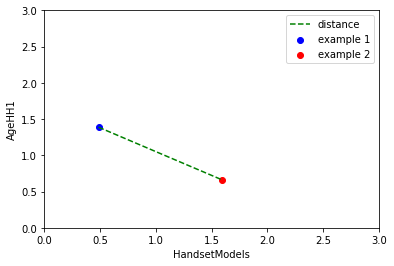

In [7]:
# example 1 (row 0):
vector_A = [df.loc[0]['HandsetModels'], df.loc[0]['AgeHH1']]

# example 2 (row 4):
vector_B = [df.loc[4]['HandsetModels'], df.loc[4]['AgeHH1']]


plt.scatter(vector_A[0],vector_A[1] ,c='b',label='example 1')
plt.scatter(vector_B[0],vector_B[1], c='r', label='example 2')
plt.plot([vector_A[0],vector_B[0]], [vector_A[1],vector_B[1]], c='g', linestyle='dashed', label ='distance')

plt.xlim([0, 3])
plt.ylim([0, 3])
plt.xlabel('HandsetModels')
plt.ylabel('AgeHH1')

plt.legend(loc='upper right');
plt.show()

You will use the Euclidean distance formula to find the distance between these two vectors. 


Use the Euclidean distance formula to calculate the distance between `vector_A` and `vector_B` by hand and save the result to variable `euc_distance`.

For simplicity, use the following rounded vector values in your calculation:

vector_A: `(0.5, 1.4)`

vector_B:  `(1.6, 0.7)`

### Graded Cell
The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [29]:
# YOUR CODE HERE
euc_distance = (((0.5 - 1.6)**2) + ((1.4 - 0.7)**2))**(1/2)
euc_distance

1.3038404810405297

### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell.

In [30]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testEuc

try:
    p, err = testEuc(euc_distance)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    


Correct!


## Step 1: Filter Numerical Features

We will now compute the Euclidean distance between two rows in DataFrame `df`, using all of their numerical feature values. Let us create a new DataFrame that contains only the numerically valued columns of the original `df` DataFrame.

In [31]:
df_numerical = df.select_dtypes(include=['int64','float64'])

print(df_numerical.shape)
df_numerical.head()


(51047, 36)


,CustomerID,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,3000002,-0.782676,-0.578738,-1.041153,-0.289532,-0.414422,-0.125914,-0.564836,-0.449987,-0.587303,...,0.487071,-0.077013,1.387766,-0.883541,4.662897,-0.1283,-0.169283,-0.103411,-0.140707,-0.864858
1,3000010,-0.940180,-0.973177,-1.250809,-0.401714,-0.414422,-0.125914,0.029311,0.030120,-0.631532,...,-0.616775,3.019920,0.392039,0.871495,-0.180167,-0.1283,-0.169283,0.215243,-0.140707,-0.864858
2,3000014,-0.468118,-0.976952,-0.370255,-0.401714,-0.414422,-0.125914,0.037077,0.030120,-0.664703,...,-0.616775,3.019920,-0.241605,0.202910,-0.180167,-0.1283,-0.169283,0.533896,-0.140707,-0.368174
3,3000022,0.526784,1.484048,1.181196,0.154708,-0.414422,-0.125914,0.654524,0.234797,4.012499,...,2.694763,0.305179,-0.060564,-0.883541,-0.180167,-0.1283,-0.169283,0.533896,-0.140707,-1.195980
4,3000026,-0.936810,-0.992050,-1.250809,-0.401714,-0.414422,-0.125914,0.044844,0.025066,-0.664703,...,1.590917,1.857585,0.663601,1.372934,-0.180167,-0.1283,-0.169283,1.489856,2.469282,-1.195980


We will exclude the `CustomerID` column, since it contains the customer ID and not a feature that we want to consider.

In [32]:
df_numerical = df_numerical.drop(columns=['CustomerID'])
df_numerical.head()

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
0,-0.782676,-0.578738,-1.041153,-0.289532,-0.414422,-0.125914,-0.564836,-0.449987,-0.587303,-0.309284,...,0.487071,-0.077013,1.387766,-0.883541,4.662897,-0.1283,-0.169283,-0.103411,-0.140707,-0.864858
1,-0.940180,-0.973177,-1.250809,-0.401714,-0.414422,-0.125914,0.029311,0.030120,-0.631532,-0.373230,...,-0.616775,3.019920,0.392039,0.871495,-0.180167,-0.1283,-0.169283,0.215243,-0.140707,-0.864858
2,-0.468118,-0.976952,-0.370255,-0.401714,-0.414422,-0.125914,0.037077,0.030120,-0.664703,-0.373230,...,-0.616775,3.019920,-0.241605,0.202910,-0.180167,-0.1283,-0.169283,0.533896,-0.140707,-0.368174
3,0.526784,1.484048,1.181196,0.154708,-0.414422,-0.125914,0.654524,0.234797,4.012499,0.330172,...,2.694763,0.305179,-0.060564,-0.883541,-0.180167,-0.1283,-0.169283,0.533896,-0.140707,-1.195980
4,-0.936810,-0.992050,-1.250809,-0.401714,-0.414422,-0.125914,0.044844,0.025066,-0.664703,-0.373230,...,1.590917,1.857585,0.663601,1.372934,-0.180167,-0.1283,-0.169283,1.489856,2.469282,-1.195980


We will compute the Euclidean distance between two examples in our data. In other words, our vectors $A$ and $B$ will be two distinct *rows* of our DataFrame `df_numerical` (which we filtered to include only numerical columns).

The code cell below randomly samples two rows from the `df_numerical` dataset and stores each in new DataFrame objects named `A` and `B`, respectively.

In [33]:
A = df_numerical.sample(replace=False)
B = df_numerical.sample(replace=False)

In [34]:
A

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
34441,-0.613489,-0.803323,-0.286393,-0.401714,-0.383361,-0.125914,0.355509,0.009905,-0.664703,-0.37323,...,-0.616775,-0.447384,0.120477,-0.883541,-0.180167,-0.1283,-0.169283,1.171203,-0.140707,-0.368174


In [35]:
B

,MonthlyRevenue,MonthlyMinutes,TotalRecurringCharge,DirectorAssistedCalls,OverageMinutes,RoamingCalls,PercChangeMinutes,PercChangeRevenues,DroppedCalls,BlockedCalls,...,HandsetModels,CurrentEquipmentDays,AgeHH1,AgeHH2,RetentionCalls,RetentionOffersAccepted,ReferralsMadeBySubscriber,IncomeGroup,AdjustmentsToCreditRating,HandsetPrice
41444,-0.351732,-0.597611,-0.076738,-0.401714,-0.300535,-0.125914,-0.110488,0.002324,-0.111843,-0.345825,...,-0.616775,-0.459204,0.210998,-0.883541,-0.180167,-0.1283,-0.169283,-1.378025,-0.140707,-0.368174


## Step 2: Compute the Euclidean Distance Between Two Vectors Using Python

We will first implement a function that finds the Euclidean distance in Python. Since we will be working with Python, let us convert DataFrames `A` and `B` into Python lists.

In [36]:
list_A = A.values.flatten().tolist()
list_B = B.values.flatten().tolist()

list_A


[-0.6134889948771539,
 -0.8033229743097002,
 -0.2863932228275385,
 -0.401713856305114,
 -0.3833614897161569,
 -0.1259135548660268,
 0.3555089707272311,
 0.00990498321166275,
 -0.6647034388675205,
 -0.3732298941128018,
 -0.7276755967607641,
 -0.366751757368111,
 -0.2557966673525969,
 -0.6895553818754261,
 -0.7207775717511964,
 -0.490714301879531,
 -0.8628164334276991,
 -0.7293744988883131,
 -0.6530323097916004,
 -0.020662564533263195,
 -0.3295397355456733,
 -0.9955329069302788,
 0.38242109864799056,
 0.9558674689671052,
 -0.6052210357588325,
 -0.6167750550310884,
 -0.4473840282314865,
 0.120477200078548,
 -0.8835413549257738,
 -0.18016687925557376,
 -0.12830030819753901,
 -0.16928338528385997,
 1.1712029108663513,
 -0.14070742066769315,
 -0.3681739534357243]

Using the definition above, complete the function below that returns the Euclidean distance between its two list inputs. <br>

You will use a traditional `for` loop to handle the computation for each pair of i-th coordinates of the two input lists (You can think of each pair as a 'column' in a DataFrame with just two rows -- $A$ and $B$.). 

<b>Tip</b>: to compute the square root, use the Python `math.sqrt()` function.

### Graded Cell
The cell below will be graded. Remove the line "raise NotImplementedError()" before writing your code.

In [37]:
def euclidean_distance(vector1 , vector2):
    ## the sum_squares variable will contain the current value of the sum of squares of each i-th coordinate pair
    sum_squares = 0
    
    numberOfIterations = len(vector1)
    
    ## TODO: Complete loop below ## 
    
    # The number of times the loop will be executed is the length of the vectors.
    # 
    # At each loop iteration, you will:
    #  Step 1. index into each vector and find the difference between the ith element in vector2 and vector1 
    #  Step 2. square the difference
    #  Step 3. update the value of the 'sum_squares' variable by adding the result in Step 2 to 
    #          the existing value of sum_squares
    

    for i in range(numberOfIterations):
        
        # Inside this loop follow steps 1-3 to update the value of the 'sum_squares' variable by
        # adding the squared difference of the i'th coordinate pair to the sum.
        
        currentDifference = (vector2[i] - vector1[i]) ** 2
        sum_squares += currentDifference


    ### TODO: Compute the Distance ###  
    
    # Compute the square root of the variable 'sum_squares' and assign 
    # that result to a new variable named 'distance'
    
    # YOUR CODE HERE
    distance = math.sqrt(sum_squares)
    
    # return the Euclidean distance
    return distance

### Self-Check

Run the cell below to test the correctness of your code above before submitting for grading. Do not add code or delete code in the cell.

In [38]:
# Run this self-test cell to check your code; 
# do not add code or delete code in this cell
from jn import testFunction

try:
    p, err = testFunction(euclidean_distance)
    print(err)
except Exception as e:
    print("Error!\n" + str(e))
    


Correct!


The code cell below tests your function. Run the cell to view the results.

In [39]:
euclidean_distance(list_A, list_B)


3.5620459731794902

## Step 3: Compute the Euclidean Distance Between Two Vectors Using NumPy 

The Numpy package provides an easy way to compute the Euclidean distance between two vectors. NumPy has a `norm()` function, which is part of a linear algebra module called `linalg.` You can call the function using this syntax: `np.linalg.norm()`. The `norm([vector_name])`finds a vector norm. A vector has both magnitude and direction, and calculating the vector norm finds the magnitude.

By default, the `norm()` function calculates the L2 norm, also known as the Euclidean norm since it calculates the Euclidean distance. We can therefore use the  `norm()` function to calculate the distance between two vectors.

The `norm()` function requires that its input vectors be of type NumPy array. The code cell below converts DataFrame `A` and `B` to NumPy arrays and uses the `norm()` function to find the Euclidean distance. 

Run the cell below and compare the results. Is the Euclidean distance the same value as what your function `euclidean_distance` produces? Try using the `norm()` function to find the Euclidean Distance between the vectors `vector_A` and `vector_B` as well.



In [40]:
array1 = np.array(A)
array2 = np.array(B)
np.linalg.norm(array2-array1)


3.5620459731794902

You can see how easy it is to find the Euclidean distance between two vectors, or examples using NumPy! For more information about the `norm()` function, consult the online [documentation](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).